In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Models.grid_search_utils import GridSearch as Gs
from pandas import DataFrame

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
    

In [2]:
LGBMRanker = Gs.load_model(name="../Models/BlackBox/lmart/saved_models/LGBMRanker")
FIGSReg = Gs.load_model(name="../Models/GlassBox/figs/saved_models/FIGSReg")
EBMReg = Gs.load_model(name="../Models/GlassBox/ebm/saved_models/EBMReg")
test_set = pd.read_csv("../outputs/scores/0_dataset_ts.csv")

In [3]:
job = test_set[test_set["qId"]==84].copy()

output_lgmb = LGBMRanker.predict(job.iloc[:,5:].to_numpy())
output_ebm = EBMReg.predict(job.iloc[:,5:].to_numpy())
output_figs = FIGSReg.predict(job.iloc[:,5:].to_numpy())

rank_w_score = pd.DataFrame(job["w_score"].values, index=job.index, columns=["pred"])
rank_w_score = rank_w_score.sort_values(by="pred", ascending=False).head(10)
rank_w_score["rank"] = rank_w_score["pred"].rank(method="first")
rank_w_score["ax"] = 0


rank_lgmb = pd.DataFrame(output_lgmb, index=job.index, columns=["pred"])
rank_lgmb = rank_lgmb.sort_values(by="pred",ascending=False).head(10)
rank_lgmb["rank"] = rank_lgmb["pred"].rank(method="first")
rank_lgmb["ax"] = 1

rank_ebm = pd.DataFrame(output_ebm, index=job.index, columns=["pred"])
rank_ebm = rank_ebm.sort_values(by="pred",ascending=False).head(10)
rank_ebm["rank"] = rank_ebm["pred"].rank(method="first")
rank_ebm["ax"] = 2

rank_figs = pd.DataFrame(output_figs, index=job.index, columns=["pred"])
rank_figs = rank_figs.sort_values(by="pred",ascending=False).head(10)
rank_figs["rank"] = rank_figs["pred"].rank(method="first")
rank_figs["ax"] = 3

In [4]:
rank_ebm

,pred,rank,ax
988,74.485662,10.0,2
1362,70.285241,9.0,2
3843,68.599907,8.0,2
3526,68.161646,7.0,2
5063,65.838409,6.0,2
3852,65.396058,5.0,2
1102,65.301685,4.0,2
1260,64.546643,3.0,2
3035,61.712641,2.0,2
2199,61.245368,1.0,2


In [5]:
job

,qId,kId,score,w_score,binned_score,fitness_edu_basic,fitness_edu_bonus,fitness_city,fitness_age,fitness_exp_basic,...,fitness_lang_lvl_basic,fitness_lang_bonus,fitness_comp_basic,fitness_comp_sim_basic,fitness_comp_bonus,fitness_comp_sim_bonus,fitness_know_basic,fitness_know_sim_basic,fitness_know_bonus,fitness_know_sim_bonus
100,84,6949,2.50,14.911540,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.25,0.0,0.0,0.0,0.25,0.0,0.0
695,84,6929,4.75,47.495353,3,1.0,0.0,0.0,1.0,0.0,...,0.5,0.0,1.00,0.00,0.0,0.0,0.5,0.25,0.0,0.0
988,84,6889,9.25,77.849583,4,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.75,0.50,0.0,0.0,1.0,0.00,0.0,0.0
1050,84,6930,6.00,53.010801,3,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.25,0.75,0.0,0.0,0.5,0.50,0.0,0.0
1102,84,6900,7.75,67.575769,4,1.0,1.0,0.0,1.0,1.0,...,0.5,0.5,0.75,0.50,0.0,0.0,1.0,0.00,0.0,0.0
1260,84,6916,8.00,62.948126,4,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.50,0.50,0.0,0.0,1.0,0.00,0.0,0.0
1362,84,6935,8.50,64.341113,4,1.0,1.0,0.0,1.0,1.0,...,1.0,0.5,0.50,0.50,0.0,0.0,1.0,0.00,0.0,0.0
2199,84,6895,7.00,61.889431,3,1.0,1.0,0.0,1.0,1.0,...,0.5,0.0,1.00,0.00,0.0,0.0,0.5,0.50,0.0,0.0
2504,84,6906,6.00,60.141561,3,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.75,0.0,0.0,0.5,0.25,0.0,0.0
2659,84,6919,6.00,60.421066,3,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.50,0.0,0.0,1.0,0.00,0.0,0.0


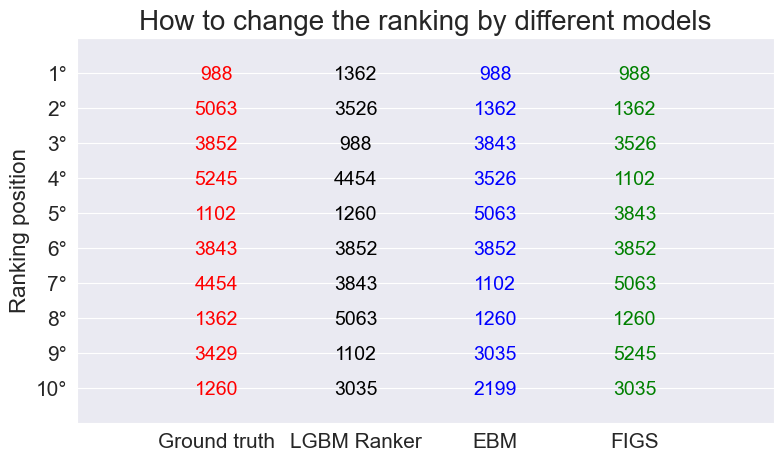

In [6]:
sns.set_style("darkgrid")

_, axs = plt.subplots(figsize=(9, 5))

color = ["Red","Black","Blue","Green"]
for i, dt in enumerate([rank_w_score,rank_lgmb,rank_ebm,rank_figs]):
    for kId in dt.index:
        y = dt.loc[kId, "rank"] - 0.2
        x = dt.loc[kId, "ax"]
        axs.text(x, y, kId, horizontalalignment='center', size=14, color=color[i])
        
axs.set_xticks([-1, 0, 1, 2, 3, 4],["","Ground truth","LGBM Ranker","EBM","FIGS",""])
axs.set_yticks([*range(1,12)],[str(i)+"°" for i in range(10,0,-1)]+[""])
axs.tick_params(axis='both', labelsize=15)
axs.set_xlabel("")
axs.set_ylabel("Ranking position",fontsize=16)
axs.set_title("How to change the ranking by different models", fontsize=20)
axs.grid(axis='x')
plt.show()